# HF Transformers 核心模块学习：Pipelines

**Pipelines**（管道）是使用模型进行推理的一种简单易上手的方式。

这些管道是抽象了 Transformers 库中大部分复杂代码的对象，提供了一个专门用于多种任务的简单API，包括**命名实体识别、掩码语言建模、情感分析、特征提取和问答**等。


| Modality                    | Task                         | Description                                                | Pipeline API                                  |
| --------------------------- | ---------------------------- | ---------------------------------------------------------- | --------------------------------------------- |
| Audio                       | Audio classification         | 为音频文件分配一个标签                                     | pipeline(task=“audio-classification”)         |
|                             | Automatic speech recognition | 将音频文件中的语音提取为文本                               | pipeline(task=“automatic-speech-recognition”) |
| Computer vision             | Image classification         | 为图像分配一个标签                                         | pipeline(task=“image-classification”)         |
|                             | Object detection             | 预测图像中目标对象的边界框和类别                           | pipeline(task=“object-detection”)             |
|                             | Image segmentation           | 为图像中每个独立的像素分配标签（支持语义、全景和实例分割） | pipeline(task=“image-segmentation”)           |
| Natural language processing | Text classification          | 为给定的文本序列分配一个标签                               | pipeline(task=“sentiment-analysis”)           |
|                             | Token classification         | 为序列里的每个 token 分配一个标签（人, 组织, 地址等等）    | pipeline(task=“ner”)                          |
|                             | Question answering           | 通过给定的上下文和问题, 在文本中提取答案                   | pipeline(task=“question-answering”)           |
|                             | Summarization                | 为文本序列或文档生成总结                                   | pipeline(task=“summarization”)                |
|                             | Translation                  | 将文本从一种语言翻译为另一种语言                           | pipeline(task=“translation”)                  |
| Multimodal                  | Document question answering  | 根据给定的文档和问题回答一个关于该文档的问题。             | pipeline(task=“document-question-answering”)  |
|                             | Visual Question Answering    | 给定一个图像和一个问题，正确地回答有关图像的问题           | pipeline(task=“vqa”)                          |



Pipelines 已支持的完整任务列表：https://huggingface.co/docs/transformers/task_summary


## Pipeline API

**Pipeline API** 是对所有其他可用管道的包装。它可以像任何其他管道一样实例化，并且降低AI推理的学习和使用成本。

![](docs/images/pipeline_func.png)

### 使用 Pipeline API 实现 Text Classification 任务


**Text classification**(文本分类)与任何模态中的分类任务一样，文本分类将一个文本序列（可以是句子级别、段落或者整篇文章）标记为预定义的类别集合之一。文本分类有许多实际应用，其中包括：

- 情感分析：根据某种极性（如积极或消极）对文本进行标记，以在政治、金融和市场等领域支持决策制定。
- 内容分类：根据某个主题对文本进行标记，以帮助组织和过滤新闻和社交媒体信息流中的信息（天气、体育、金融等）。


下面以 `Text classification` 中的情感分析任务为例，展示如何使用 Pipeline API。

模型主页：https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english

## transformers 自定义模型下载的路径

在transformers自定义模型下载的路径方法

```python
import os

os.environ['HF_HOME'] = '/mnt/new_volume/hf'
os.environ['HF_HUB_CACHE'] = '/mnt/new_volume/hf/hub'
```

In [1]:
from transformers import pipeline

In [2]:
# 仅指定任务时，使用默认模型（不推荐）
pipe = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
pipe("今儿北京可真冷啊")

[{'label': 'NEGATIVE', 'score': 0.5240048766136169}]

In [4]:
pipe("我觉得这家店蒜泥白肉的味道一般")

[{'label': 'NEGATIVE', 'score': 0.9238731861114502}]

In [5]:
# 默认使用的模型 distilbert-base-uncased-finetuned-sst-2-english 
# 并未针对中文做太多训练，中文的文本分类任务表现未必满意
pipe("你学东西真的好快，理论课一讲就明白了")

[{'label': 'NEGATIVE', 'score': 0.8578693866729736}]

In [6]:
# 替换为英文后，文本分类任务的表现立刻改善
pipe("You learn things really quickly. You understand the theory class as soon as it is taught.")

[{'label': 'POSITIVE', 'score': 0.9961802959442139}]

### 批处理调用模型推理

In [7]:
text_list = [
    "Today Shanghai is really cold.",
    "I think the taste of the garlic mashed pork in this store is average.",
    "You learn things really quickly. You understand the theory class as soon as it is taught."
]

pipe(text_list)

[{'label': 'NEGATIVE', 'score': 0.9995032548904419},
 {'label': 'NEGATIVE', 'score': 0.9984821677207947},
 {'label': 'POSITIVE', 'score': 0.9961802959442139}]

## 使用 Pipeline API 调用更多预定义任务

## Natural Language Processing(NLP)

**NLP**(自然语言处理)任务是最常见的任务类型之一，因为文本是我们进行交流的一种自然方式。要将文本转换为模型可识别的格式，需要对其进行分词。这意味着将一系列文本划分为单独的单词或子词（标记），然后将这些标记转换为数字。结果就是，您可以将一系列文本表示为一系列数字，并且一旦您拥有了一系列数字，它就可以输入到模型中来解决各种NLP任务！

上面演示的 文本分类任务，以及接下来的标记、问答等任务都属于 NLP 范畴。

### Token Classification

在任何NLP任务中，文本都经过预处理，将文本序列分成单个单词或子词。这些被称为tokens。

**Token Classification**（Token分类）将每个token分配一个来自预定义类别集的标签。

两种常见的 Token 分类是：

- 命名实体识别（NER）：根据实体类别（如组织、人员、位置或日期）对token进行标记。NER在生物医学设置中特别受欢迎，可以标记基因、蛋白质和药物名称。
- 词性标注（POS）：根据其词性（如名词、动词或形容词）对标记进行标记。POS对于帮助翻译系统了解两个相同的单词如何在语法上不同很有用（作为名词的银行与作为动词的银行）。

模型主页：https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english

In [8]:
from transformers import pipeline
classifier = pipeline(task='ner')

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

C:\Users\60332\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\60332\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

In [9]:
preds = classifier("Hugging Face is a French company based in New York City.")
preds = [
    {
        "entity": pred["entity"],
        "score": round(pred["score"], 4),
        "index": pred["index"],
        "word": pred["word"],
        "start": pred["start"],
        "end": pred["end"],
    }
    for pred in preds
]
print(*preds, sep="\n")

{'entity': 'I-ORG', 'score': 0.9968, 'index': 1, 'word': 'Hu', 'start': 0, 'end': 2}
{'entity': 'I-ORG', 'score': 0.9293, 'index': 2, 'word': '##gging', 'start': 2, 'end': 7}
{'entity': 'I-ORG', 'score': 0.9763, 'index': 3, 'word': 'Face', 'start': 8, 'end': 12}
{'entity': 'I-MISC', 'score': 0.9983, 'index': 6, 'word': 'French', 'start': 18, 'end': 24}
{'entity': 'I-LOC', 'score': 0.999, 'index': 10, 'word': 'New', 'start': 42, 'end': 45}
{'entity': 'I-LOC', 'score': 0.9987, 'index': 11, 'word': 'York', 'start': 46, 'end': 50}
{'entity': 'I-LOC', 'score': 0.9992, 'index': 12, 'word': 'City', 'start': 51, 'end': 55}


#### 合并实体

In [10]:
classifier = pipeline(task="ner", grouped_entities=True)
classifier("Hugging Face is a French company based in New York City.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
D:\anaconda3\lib\site-packages\transformers\pipelines\token_classification.py:135: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="simple"` instead.
  warnings.warn(


[{'entity_group': 'ORG',
  'score': 0.96746355,
  'word': 'Hugging Face',
  'start': 0,
  'end': 12},
 {'entity_group': 'MISC',
  'score': 0.99828726,
  'word': 'French',
  'start': 18,
  'end': 24},
 {'entity_group': 'LOC',
  'score': 0.99896103,
  'word': 'New York City',
  'start': 42,
  'end': 55}]

### Question Answering

**Question Answering**(问答)是另一个token-level的任务，返回一个问题的答案，有时带有上下文（开放领域），有时不带上下文（封闭领域）。每当我们向虚拟助手提出问题时，例如询问一家餐厅是否营业，就会发生这种情况。它还可以提供客户或技术支持，并帮助搜索引擎检索您要求的相关信息。

有两种常见的问答类型：

- 提取式：给定一个问题和一些上下文，模型必须从上下文中提取出一段文字作为答案
- 生成式：给定一个问题和一些上下文，答案是根据上下文生成的；这种方法由`Text2TextGenerationPipeline`处理，而不是下面展示的`QuestionAnsweringPipeline`

模型主页：https://huggingface.co/distilbert-base-cased-distilled-squad

In [15]:
from transformers import pipeline

question_answerer = pipeline(task="question-answering",model='timpal0l/mdeberta-v3-base-squad2')

config.json:   0%|          | 0.00/879 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/453 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/16.3M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [16]:
preds = question_answerer(
    question="What is the name of the repository?",
    context="The name of the repository is huggingface/transformers",
)
print(
    f"score: {round(preds['score'], 4)}, start: {preds['start']}, end: {preds['end']}, answer: {preds['answer']}"
)

score: 0.9839, start: 29, end: 54, answer:  huggingface/transformers


In [17]:
preds = question_answerer(
    question="What is the capital of China?",
    context="On 1 October 1949, CCP Chairman Mao Zedong formally proclaimed the People's Republic of China in Tiananmen Square, Beijing.",
)
print(
    f"score: {round(preds['score'], 4)}, start: {preds['start']}, end: {preds['end']}, answer: {preds['answer']}"
)

score: 0.9296, start: 114, end: 123, answer:  Beijing.


### Summarization

**Summarization**(文本摘要）从较长的文本中创建一个较短的版本，同时尽可能保留原始文档的大部分含义。摘要是一个序列到序列的任务；它输出比输入更短的文本序列。有许多长篇文档可以进行摘要，以帮助读者快速了解主要要点。法案、法律和财务文件、专利和科学论文等文档可以摘要，以节省读者的时间并作为阅读辅助工具。

与问答类似，摘要有两种类型：

- 提取式：从原始文本中识别和提取最重要的句子
- 生成式：从原始文本中生成目标摘要（可能包括输入文件中没有的新单词）；`SummarizationPipeline`使用生成式方法

模型主页：https://huggingface.co/t5-base

In [1]:
from transformers import pipeline

summarizer = pipeline(task="summarization",
                      model="t5-base",
                      min_length=8,
                      max_length=32,
)

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

C:\Users\60332\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\60332\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/892M [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

D:\anaconda3\lib\site-packages\transformers\models\t5\tokenization_t5_fast.py:156: FutureWarning: This tokenizer was incorrectly instantiated with a model max length of 512 which will be corrected in Transformers v5.
For now, this behavior is kept to avoid breaking backwards compatibility when padding/encoding with `truncation is True`.
- Be aware that you SHOULD NOT rely on t5-base automatically truncating your input to 512 when padding/encoding.
- If you want to encode/pad to sequences longer than 512 you can either instantiate this tokenizer with `model_max_length` or pass `max_length` when encoding/padding.
- To avoid this warning, please instantiate this tokenizer with `model_max_length` set to your preferred value.
  warnings.warn(


In [2]:
summarizer(
    """
    In this work, we presented the Transformer, the first sequence transduction model based entirely on attention, 
    replacing the recurrent layers most commonly used in encoder-decoder architectures with multi-headed self-attention. 
    For translation tasks, the Transformer can be trained significantly faster than architectures based on recurrent or convolutional layers. 
    On both WMT 2014 English-to-German and WMT 2014 English-to-French translation tasks, we achieve a new state of the art. 
    In the former task our best model outperforms even all previously reported ensembles.
    """
)

[{'summary_text': 'the Transformer is the first sequence transduction model based entirely on attention . it replaces recurrent layers commonly used in encoder-decode'}]

### Automatic speech recognition（ASR）

**Automatic speech recognition**（自动语音识别）将语音转录为文本。这是最常见的音频任务之一，部分原因是因为语音是人类交流的自然形式。如今，ASR系统嵌入在智能技术产品中，如扬声器、电话和汽车。我们可以要求虚拟助手播放音乐、设置提醒和告诉我们天气。

但是，Transformer架构帮助解决的一个关键挑战是低资源语言。通过在大量语音数据上进行预训练，仅在一个低资源语言的一小时标记语音数据上进行微调，仍然可以产生与以前在100倍更多标记数据上训练的ASR系统相比高质量的结果。

模型主页：https://huggingface.co/openai/whisper-small

下面展示使用 `OpenAI Whisper Small` 模型实现 ASR 的 Pipeline API 示例：

In [10]:
!pip install ffmpeg ffmpeg-python

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [11]:
from transformers import pipeline

# 使用 `model` 参数指定模型
transcriber = pipeline(task="automatic-speech-recognition", model="openai/whisper-small")

In [12]:
text = transcriber("data/audio/mlk.flac")
text

ValueError: ffmpeg was not found but is required to load audio files from filename

## Computer Vision 计算机视觉

**Computer Vision**（计算机视觉）任务中最早成功之一是使用卷积神经网络（CNN）识别邮政编码数字图像。图像由像素组成，每个像素都有一个数值。这使得将图像表示为像素值矩阵变得容易。每个像素值组合描述了图像的颜色。

计算机视觉任务可以通过以下两种通用方式解决：

- 使用卷积来学习图像的层次特征，从低级特征到高级抽象特征。
- 将图像分成块，并使用Transformer逐步学习每个图像块如何相互关联以形成图像。与CNN偏好的自底向上方法不同，这种方法有点像从一个模糊的图像开始，然后逐渐将其聚焦清晰。

### Image Classificaiton

**Image Classificaiton**(图像分类)将整个图像从预定义的类别集合中进行标记。像大多数分类任务一样，图像分类有许多实际用例，其中一些包括：

- 医疗保健：标记医学图像以检测疾病或监测患者健康状况
- 环境：标记卫星图像以监测森林砍伐、提供野外管理信息或检测野火
- 农业：标记农作物图像以监测植物健康或用于土地使用监测的卫星图像
- 生态学：标记动物或植物物种的图像以监测野生动物种群或跟踪濒危物种

模型主页：https://huggingface.co/google/vit-base-patch16-224

In [1]:
from transformers import pipeline
classifier = pipeline(task="image-classification")

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/69.7k [00:00<?, ?B/s]

C:\Users\60332\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\60332\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/346M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [2]:
preds = classifier(
    "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/pipeline-cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.4403, 'label': 'lynx, catamount'}
{'score': 0.0343, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}
{'score': 0.0321, 'label': 'snow leopard, ounce, Panthera uncia'}
{'score': 0.0235, 'label': 'Egyptian cat'}
{'score': 0.023, 'label': 'tiger cat'}


In [3]:
# 使用本地图片（狼猫）
preds = classifier(
    "data/image/cat-chonk.jpeg"
)
preds = [{"score": round(pred["score"], 4), "label": pred["label"]} for pred in preds]
print(*preds, sep="\n")

{'score': 0.4403, 'label': 'lynx, catamount'}
{'score': 0.0343, 'label': 'cougar, puma, catamount, mountain lion, painter, panther, Felis concolor'}
{'score': 0.0321, 'label': 'snow leopard, ounce, Panthera uncia'}
{'score': 0.0235, 'label': 'Egyptian cat'}
{'score': 0.023, 'label': 'tiger cat'}


In [1]:
from transformers import pipeline
classifier = pipeline(task="image-classification",model='microsoft/resnet-18')

config.json:   0%|          | 0.00/69.5k [00:00<?, ?B/s]

C:\Users\60332\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:147: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\60332\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


pytorch_model.bin:   0%|          | 0.00/46.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

In [2]:
# 使用本地图片（狼猫）
preds = classifier(
    "data/image/cat-chonk.jpeg"
)

In [3]:
preds

[{'score': 0.6477717757225037, 'label': 'lynx, catamount'},
 {'score': 0.06533016264438629, 'label': 'tabby, tabby cat'},
 {'score': 0.03307666257023811, 'label': 'tiger cat'},
 {'score': 0.03017376735806465, 'label': 'wombat'},
 {'score': 0.025284698233008385,
  'label': 'wood rabbit, cottontail, cottontail rabbit'}]

### Object Detection

与图像分类不同，目标检测在图像中识别多个对象以及这些对象在图像中的位置（由边界框定义）。目标检测的一些示例应用包括：

- 自动驾驶车辆：检测日常交通对象，如其他车辆、行人和红绿灯
- 遥感：灾害监测、城市规划和天气预报
- 缺陷检测：检测建筑物中的裂缝或结构损坏，以及制造业产品缺陷

模型主页：https://huggingface.co/facebook/detr-resnet-50

#### 前置依赖包安装

In [3]:
!pip install timm

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


In [2]:
from transformers import pipeline
detector = pipeline(task="object-detection")

No model was supplied, defaulted to facebook/detr-resnet-50 and revision 2729413 (https://huggingface.co/facebook/detr-resnet-50).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [3]:
preds = detector(
    "data/image/cat_dog.jpg"
)

D:\anaconda3\lib\site-packages\transformers\models\detr\feature_extraction_detr.py:851: FutureWarning: `post_process` is deprecated and will be removed in v5 of Transformers, please use `post_process_object_detection`
  warnings.warn(


In [4]:
preds

[{'score': 0.9983521699905396,
  'label': 'cat',
  'box': {'xmin': 78, 'ymin': 57, 'xmax': 310, 'ymax': 371}},
 {'score': 0.9893207550048828,
  'label': 'dog',
  'box': {'xmin': 279, 'ymin': 20, 'xmax': 482, 'ymax': 416}}]

In [18]:
import cv2
from matplotlib import pyplot as plt

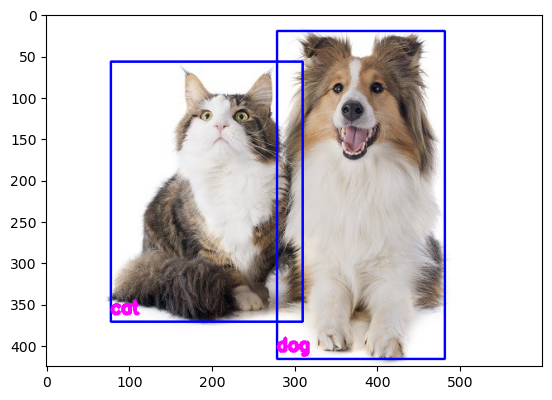

In [46]:
img = cv2.imread("data/image/cat_dog.jpg")
for pred in preds:
    xmin,ymin,xmax,ymax = pred['box']['xmin'], pred['box']['ymin'], pred['box']['xmax'], pred['box']['ymax']
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    cv2.putText(img,f"{ pred['label']}", (xmin, ymax - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 255), 3)
    
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# 使用matplotlib显示图像
plt.imshow(image_rgb)
# plt.axis('off')  # 关闭坐标轴
plt.show()